# Datasets

In [123]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import psycopg2 as pg
import pandas.io.sql as psql
import pandas as pd
connection = pg.connect(user="mp_quantri",
                                  password="asdaw@23423das",
                                  host="101.96.116.82",
                                  port="8182",
                                  database="tintuc_haisan")

In [3]:
def load_data(file,c=connection):
    filename='select * from public.'+file
    data = pd.read_sql_query(filename, c)
    #data = pd.read_sql_query('select * from public.bang_tong_hop', connection)
    return data

In [4]:
#1. hungpq_mp_cost_price # cp
#2. hungpq_mp_material_price # mp
#3. hungpq_mp_material_quantity_order # mqo
#4. hungpq_mp_material_quantity_purchase # mqp
#5. hungpq_mp_product_price # pp
#6. hungpq_mp_product_price_ring # ppr

# Save datasets
#for file in files:
#    df=load_data(file,c=connection)
#    df.to_csv(file+'.csv',index=False)
    
files=[
'hungpq_mp_cost_price',
'hungpq_mp_material_price',
'hungpq_mp_material_quantity_order',
'hungpq_mp_material_quantity_purchase',
'hungpq_mp_product_price',
'hungpq_mp_product_price_ring']

In [5]:
datasets={}
for file in files:
    df=load_data(file,c=connection)
    datasets[file]=df

In [75]:
dfp_cost=datasets['hungpq_mp_cost_price']
dfp_material=datasets['hungpq_mp_material_price']
dfp_product=datasets['hungpq_mp_product_price']
dfp_ring=datasets['hungpq_mp_product_price_ring']
dfm_order=datasets['hungpq_mp_material_quantity_order']
dfm_purchase=datasets['hungpq_mp_material_quantity_purchase']


# Price 

In [114]:
#dfp_cost.head(2) # datasets['hungpq_mp_cost_price']
#dfp_cost=dfp_cost[dfp_cost.columns[:10]]
dfp_cost=dfp_cost[['standard_type', 'standard_size', 'price', 'active_date']]
#dfp_cost.head(2) #dfp_costs: s tandard_type, standard_size, price (USD/kg), active_date

In [67]:
#dfp_product.head(2)#datasets['hungpq_mp_product_price']
#dfp_product=dfp_product[dfp_product.columns[:12]]
dfp_product=dfp_product[['standard_type', 'standard_size', 'price', 'active_date']]
#dfp_product.head(2)# dfp_product: standard_type, standard_size, price (USD/kg), active_date

In [66]:
#dfp_ring.head(2)#datasets['hungpq_mp_product_price_ring']
#dfp_ring=dfp_ring[dfp_ring.columns[:11]]
dfp_ring=dfp_ring[['standard_type', 'standard_size', 'price', 'active_date']]
#dfp_ring.head(2)# dfp_ring: standard_type, standard_size, price (USD/Ring),active_date

In [62]:
#dfp_material.head(2)#datasets['hungpq_mp_material_price']
dfp_material=dfp_material[dfp_material.columns[:6]]
#dfp_material.head(2) # standard_type, standard_size, price (1000kVND/kg),factory, active_date
dfp_material_hg=dfp_material[dfp_material['factory']=='Hậu Giang']
dfp_material_cm=dfp_material[dfp_material['factory']=='Cà Mau']
dfp_material_hg=dfp_material_hg[['standard_type', 'standard_size', 'price', 'active_date']]
dfp_material_cm=dfp_material_cm[['standard_type', 'standard_size', 'price', 'active_date']]

In [65]:
#dfp_material_hg.head(2)

In [64]:
#dfp_material_cm.head(2)

### Price: ['standard_type', 'standard_size', 'price', 'active_date']

In [63]:
# Price: ['standard_type', 'standard_size', 'price', 'active_date']
# dfp_cost, dfp_product,dfp_ring,dfp_material_hg,dfp_material_cm

In [115]:
list_type=list(dfp_cost['standard_type'].unique())
list_size=list(dfp_cost['standard_size'].unique())

In [135]:
dfp_cost_type_size=dfp_cost[(dfp_cost['standard_type']==list_type[0])&(dfp_cost['standard_size']==list_size[0])]
dfp_cost_type=dfp_cost[dfp_cost['standard_type']==list_type[0]]

In [127]:
dfp_cost_type.head()

,standard_type,standard_size,price,active_date
0,Sú sinh thái,2/4,15.30,2020-01-09
1,Sú sinh thái,2/4,16.24,2020-01-09
2,Sú sinh thái,2/4,16.69,2020-01-09
3,Sú sinh thái,2/4,17.05,2020-01-09
4,Sú sinh thái,2/4,17.51,2020-01-09


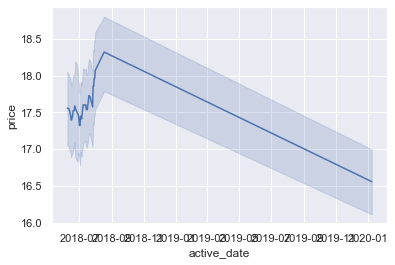

In [125]:
ax = sns.lineplot(x="active_date", y="price", markers=True,data=dfp_cost_type_size)

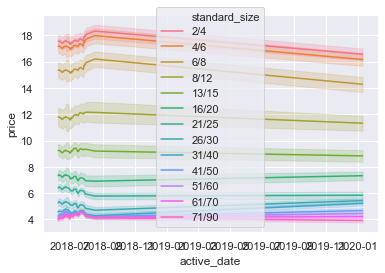

In [129]:
ax = sns.lineplot(x="active_date", y="price", hue="standard_size",data=dfp_cost_type)

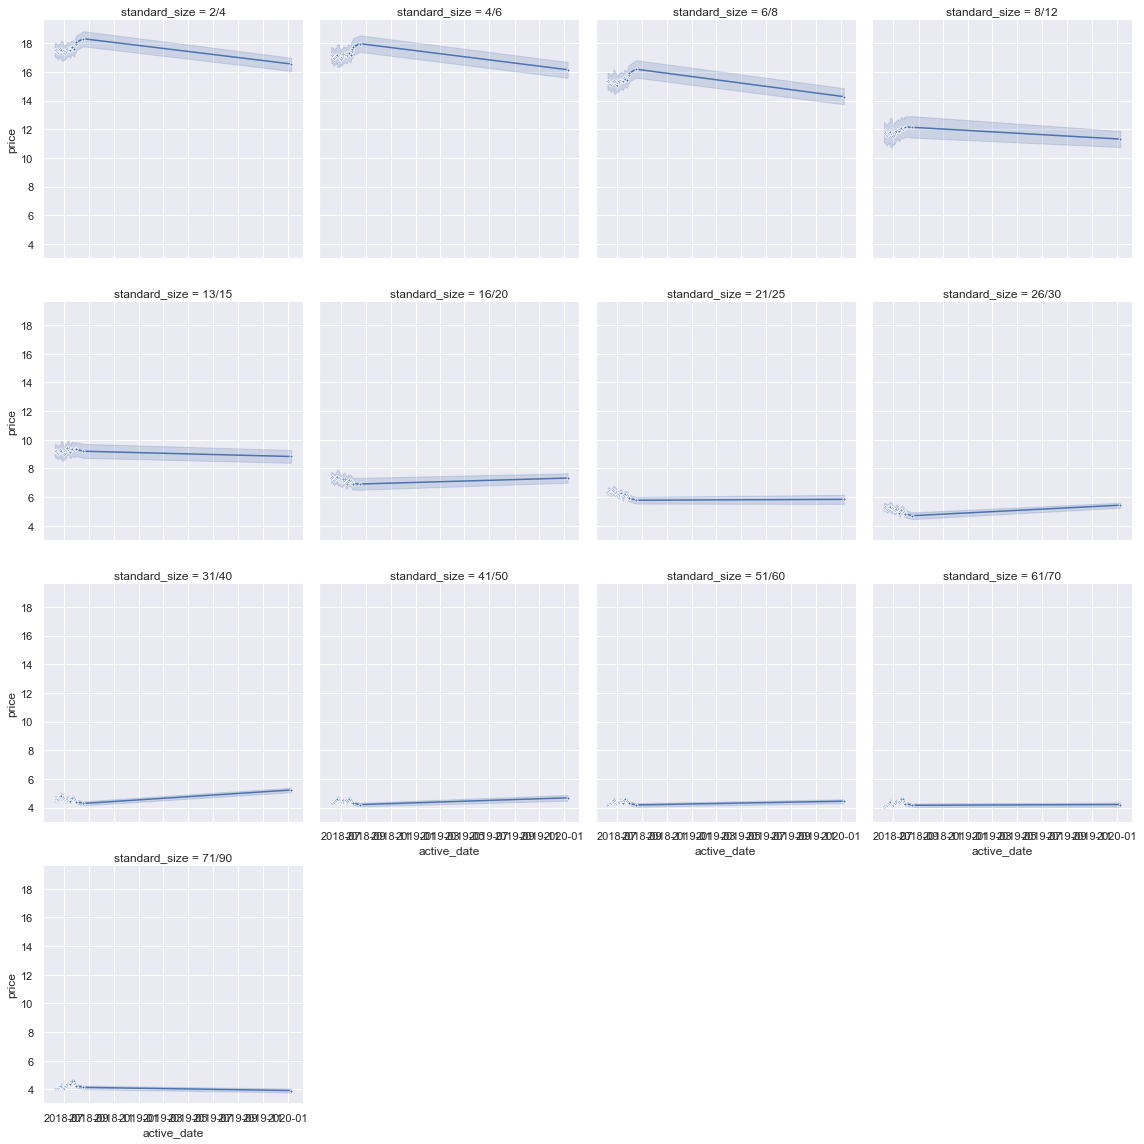

In [134]:
g = sns.FacetGrid(dfp_cost_type, col="standard_size", col_wrap=4, height=4)
g = g.map(sns.lineplot, "active_date", "price", marker=".")

# Material

In [85]:
#dfm_order.head(2)#=datasets['hungpq_mp_material_quantity_order']
dfm_order=dfm_order[dfm_order.columns[:6]]
dfm_order_hg=dfm_order[dfm_order['factory']=='Hậu Giang']
dfm_order_hg=dfm_order_hg[['type','size','quantity','active_date']]
dfm_order_cm=dfm_order[dfm_order['factory']=='Cà Mau']
dfm_order_cm=dfm_order_cm[['type','size','quantity','active_date']]

In [96]:
#dfm_order_hg.head(2)

In [97]:
# dfm_order_cm.head(2)

In [94]:
#dfm_purchase.head(2)#datasets['hungpq_mp_material_quantity_purchase']
dfm_purchase=dfm_purchase[dfm_purchase.columns[:6]]
dfm_purchase_hg=dfm_purchase[dfm_purchase['factory']=='Hậu Giang']
dfm_purchase_hg=dfm_purchase_hg[['type','size','quantity','active_date']]
dfm_purchase_cm=dfm_purchase[dfm_purchase['factory']=='Cà Mau']
dfm_purchase_cm=dfm_purchase_cm[['type','size','quantity','active_date']]
#dfm_purchase.head(2)

In [98]:
#dfm_purchase_hg.head(2)

In [99]:
#dfm_purchase_cm.head(2)

In [100]:
# Material # ['type','size','quantity','active_date']
#dfm_order_hg,dfm_order_cm, dfm_purchase_hg,dfm_purchase_cm